In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 281s 2us/step


In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train[0].shape

(32, 32, 3)

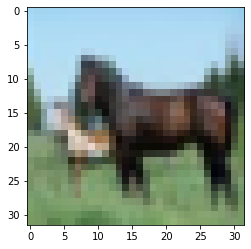

In [21]:
plt.imshow(x_train[12])

## Preprocessing

In [22]:
x_train = x_train/255

In [23]:
x_test = x_test/255

In [24]:
x_test.shape

(10000, 32, 32, 3)

In [25]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_cat_train = to_categorical(y_train,10)

In [28]:
y_cat_test = to_categorical(y_test,10)

In [30]:
y_train[0]

array([6], dtype=uint8)

## Model Building

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [33]:
model = Sequential()

#CONVOLUTION LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTION LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=[x_test,y_cat_test],callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.5542 - accuracy: 0.4377 - val_loss: 1.4084 - val_accuracy: 0.5023
Epoch 2/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.2439 - accuracy: 0.5579 - val_loss: 1.1963 - val_accuracy: 0.5795
Epoch 3/15
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.0949 - accuracy: 0.6169 - val_loss: 1.1332 - val_accuracy: 0.6036
Epoch 4/15
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.9861 - accuracy: 0.6544 - val_loss: 1.0541 - val_accuracy: 0.6316
Epoch 5/15
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8910 - accuracy: 0.6886 - val_loss: 1.0239 - val_accuracy: 0.6420
Epoch 6/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8127 - accuracy: 0.7181 - val_loss: 1.0457 - val_accuracy: 0.6489
Epoch 7/15
50000/50000 [==============================] 

In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.554192,0.43774,1.408380,0.5023
1,1.243946,0.55790,1.196322,0.5795
2,1.094916,0.61694,1.133224,0.6036
3,0.986148,0.65436,1.054121,0.6316
4,0.890960,0.68856,1.023945,0.6420
5,0.812711,0.71810,1.045721,0.6489
6,0.745622,0.74012,1.008037,0.6639
7,0.678303,0.76456,1.010260,0.6716
8,0.623536,0.78070,1.024376,0.6701


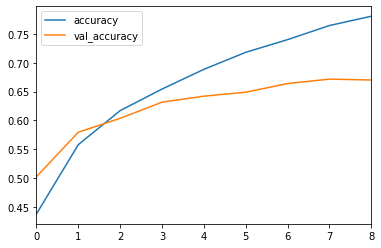

In [40]:
metrics[['accuracy','val_accuracy']].plot()

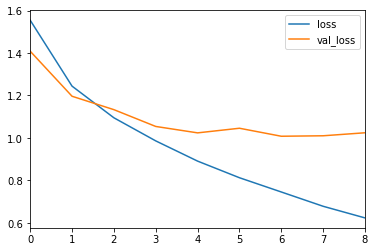

In [41]:
metrics[['loss','val_loss']].plot()